# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(df_train[i].unique()[:5]) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
['Среднее специальное' 'Среднее' 'Неполное среднее' 'Высшее'
 'Неоконченное высшее']


MARITAL_STATUS
['Состою в браке' 'Гражданский брак' 'Разведен(а)' 'Не состоял в браке'
 'Вдовец/Вдова']


GEN_INDUSTRY
['Торговля' 'Информационные технологии' 'Образование'
 'Государственная служба' 'Другие сферы']


GEN_TITLE
['Рабочий' 'Специалист' 'Руководитель среднего звена'
 'Руководитель высшего звена' 'Служащий']


ORG_TP_STATE
['Частная компания' 'Индивидуальный предприниматель'
 'Государственная комп./учреж.' nan 'Некоммерческая организация']


ORG_TP_FCAPITAL
['Без участия' nan 'С участием']


JOB_DIR
['Вспомогательный техперсонал' 'Участие в основ. деятельности'
 'Адм-хоз. и трансп. службы' 'Пр-техн. обесп. и телеком.'
 'Служба безопасности']


FAMILY_INCOME
['от 10000 до 20000 руб.' 'от 20000 до 50000 руб.' 'свыше 50000 руб.'
 'от 5000 до 10000 руб.' 'до 5000 руб.']


PERSONAL_INCOME
['5000' '12000' '9000' '25000' '15000']


REG_ADDRESS_PROVINCE
['Оренбургская область' 'Кабарди

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
# Посмотрим количество записей в датафрейме
number_of_records = df.shape[0] # он же len(df)
print(f"Всего записей:\t{number_of_records}")

# Пробежимся по всем столбцам, чтобы посмотреть, где пропуски
for i in df.columns:
    number_of_i_records = df[i].dropna().count()
    if number_of_i_records < number_of_records:
        print(f"{i}:\t{number_of_i_records}({(number_of_i_records/number_of_records):.2%})")
        
# А вообще сделаем из нее функцию:
def missingData( dataFrame ):
    number_of_records = dataFrame.shape[0] # он же len(df)
    print(f"Всего записей:\t{number_of_records}")
    for i in dataFrame.columns:
        number_of_i_records = dataFrame[i].dropna().count()
        if number_of_i_records < number_of_records:
            print(f"{i}:\t{number_of_i_records}({(number_of_i_records/number_of_records):.2%})")

Всего записей:	30133
GEN_INDUSTRY:	27420(91.00%)
GEN_TITLE:	27420(91.00%)
ORG_TP_STATE:	27420(91.00%)
ORG_TP_FCAPITAL:	27425(91.01%)
JOB_DIR:	27420(91.00%)
TP_PROVINCE:	29543(98.04%)
REGION_NM:	30131(99.99%)
WORK_TIME:	27416(90.98%)
PREVIOUS_CARD_NUM_UTILIZED:	600(1.99%)


**PREVIOUS_CARD_NUM_UTILIZED** - из описания (если пусто - 0), поэтому это первое, что исправим.
Однозначно **fillna(0)**

In [16]:
df[ df['GEN_INDUSTRY'].isnull() ][ ['GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR'] ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 1 to 30131
Data columns (total 4 columns):
GEN_TITLE          0 non-null object
ORG_TP_STATE       0 non-null object
ORG_TP_FCAPITAL    6 non-null object
JOB_DIR            0 non-null object
dtypes: object(4)
memory usage: 106.0+ KB


Что касается:
- **GEN_INDUSTRY**
- **GEN_TITLE**
- **ORG_TP_STATE**
- **ORG_TP_FCAPITAL**
- **JOB_DIR**

Скорее всего, это логически связанные столбцы.
Там где нет данных в одном столбце, нет данных и в остальных, поэтому сразу оратим внимание на этот большой кусок.
Всего в датасете отсутствует менее 10% этих данных. Набор данных в каждом их них сложный, поэтому брать усреднение или вводить новый идентификатор типа "Другое" было бы некорректно.

**Вердикт: dropna()**

In [17]:
missingData( df[ ~df['GEN_INDUSTRY'].isnull() ] )

Всего записей:	27420
ORG_TP_FCAPITAL:	27419(100.00%)
TP_PROVINCE:	26846(97.91%)
REGION_NM:	27418(99.99%)
WORK_TIME:	27416(99.99%)
PREVIOUS_CARD_NUM_UTILIZED:	558(2.04%)


После "удаления" столбцов связанных с "местом работы", видим, что пропусков почти не осталось. **TP_PROVINCE** никак не усреднишь, поэтому однозначно dropna(). А в остальных столбцах отсутствует бувально единичные значения, дропаем!
##### Итого:

In [18]:
df_clean = df.fillna({'PREVIOUS_CARD_NUM_UTILIZED': 0}).dropna()
df_clean.info() #Смотрим,что пропусков не осталось
print(f"Осталось от начального датасета:\t{(len(df_clean)/len(df)):.2%} данных")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26840 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  26840 non-null int64
TARGET                        26840 non-null int64
AGE                           26840 non-null int64
SOCSTATUS_WORK_FL             26840 non-null int64
SOCSTATUS_PENS_FL             26840 non-null int64
GENDER                        26840 non-null int64
CHILD_TOTAL                   26840 non-null int64
DEPENDANTS                    26840 non-null int64
EDUCATION                     26840 non-null object
MARITAL_STATUS                26840 non-null object
GEN_INDUSTRY                  26840 non-null object
GEN_TITLE                     26840 non-null object
ORG_TP_STATE                  26840 non-null object
ORG_TP_FCAPITAL               26840 non-null object
JOB_DIR                       26840 non-null object
FAMILY_INCOME                 26840 non-null object
PERSONAL_INCOME               26840 non-null object
REG_ADDRESS_PRO

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальных много, но рассмотрим только строковые (хотя GENDER, например, тоже  в общем-то категориальный тип ):
- EDUCATION
- MARITAL_STATUS
- GEN_INDUSTRY
- GEN_TITLE
- ORG_TP_STATE
- ORG_TP_FCAPITAL
- JOB_DIR
- FAMILY_INCOME
- REG_ADDRESS_PROVINCE
- FACT_ADDRESS_PROVINCE
- POSTAL_ADDRESS_PROVINCE
- TP_PROVINCE
- REGION_NM


In [19]:
cat_list = [ 
    'EDUCATION', 
    'MARITAL_STATUS', 
    'GEN_INDUSTRY', 
    'GEN_TITLE', 
    'ORG_TP_STATE', 
    'ORG_TP_FCAPITAL', 
    'JOB_DIR',
    'FAMILY_INCOME',
    'REG_ADDRESS_PROVINCE',
    'FACT_ADDRESS_PROVINCE',
    'POSTAL_ADDRESS_PROVINCE',
    'TP_PROVINCE',
    'REGION_NM'
]

# 
#df_clean[ cat_list ] = df_clean[ cat_list ].astype('category')
df_clean_dummy = pd.get_dummies(df_clean, columns=cat_list)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [20]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    # Удаляло идентификатор AGREEMENT_RK
    df_output.drop('AGREEMENT_RK', axis=1, inplace=True)
    
    # Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    float_list = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    df_output[ float_list ] = df_output[ float_list ].applymap(lambda x: x.replace(',', '.')).astype('float')
    
    # Что-то делала с пропусками
    df_output = df_output.fillna({'PREVIOUS_CARD_NUM_UTILIZED': 0}).dropna()
    
    # Кодировала категориальные признаки
    cat_list = [ 
        'EDUCATION',
        'MARITAL_STATUS',
        'GEN_INDUSTRY',
        'GEN_TITLE',
        'ORG_TP_STATE',
        'ORG_TP_FCAPITAL',
        'JOB_DIR',
        'FAMILY_INCOME',
        'REG_ADDRESS_PROVINCE',
        'FACT_ADDRESS_PROVINCE',
        'POSTAL_ADDRESS_PROVINCE',
        'TP_PROVINCE',
        'REGION_NM'
    ]
    df_output = pd.get_dummies(df_output, columns=cat_list)
    
    return df_output

In [21]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [22]:
df_preproc['sample']

0         test
2         test
3         test
4         test
6         test
7         test
9         test
10        test
11        test
13        test
14        test
15        test
16        test
17        test
18        test
19        test
21        test
22        test
23        test
24        test
25        test
26        test
27        test
29        test
31        test
32        test
33        test
34        test
35        test
36        test
         ...  
30099    train
30100    train
30102    train
30103    train
30104    train
30105    train
30108    train
30109    train
30110    train
30111    train
30112    train
30113    train
30114    train
30115    train
30116    train
30117    train
30118    train
30119    train
30120    train
30121    train
30122    train
30123    train
30124    train
30125    train
30126    train
30127    train
30128    train
30129    train
30130    train
30132    train
Name: sample, Length: 26840, dtype: object

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [23]:
X = df_train_preproc.drop(columns=['TARGET'])
X_test = df_test_preproc.drop(columns=['TARGET'])
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']
print(y.value_counts())
print(y_test.value_counts())
# Неясно, зачем это делать, если дальше мы все равно разделим всю выборку train_test_split'ом

0    11881
1     1688
Name: TARGET, dtype: int64
0    11634
1     1637
Name: TARGET, dtype: int64


#### Задание 5. Обучение и оценка качества разных моделей

In [24]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

df_set = df_preproc.drop(columns=['TARGET', 'sample'])
target = df_preproc['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_set, target, test_size=0.3, random_state=42)

In [25]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression(solver='liblinear')

alg_dict = {
    'DecisionTreeClassifier': { 'model': dtc },
    'RandomForestClassifier': { 'model': rfc },
    'LogisticRegression': { 'model': lr }
}

for alg_name, val in alg_dict.items():
    print(alg_name)
    model = val['model']
    model.fit(X_train, y_train)
    val['predict'] = model.predict(X_test)
    if alg_name not in ['DecisionTreeClassifier']:
        val['predict_proba'] = model.predict_proba(X_test)[:,1]
    else:
        val['predict_proba'] = val['predict'].astype('float')

DecisionTreeClassifier
RandomForestClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [26]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for alg_name, val in alg_dict.items():
    val['precision'] = precision_score(y_test, val['predict'])
    val['recall'] = recall_score(y_test, val['predict'])
    val['accuracy'] = accuracy_score(y_test, val['predict'])
    val['f1'] = f1_score(y_test, val['predict'])
    print(alg_name)
    print(f"\tprecision:\t{val['precision']:.4f}")
    print(f"\trecall:\t\t{val['recall']:.4f}")
    print(f"\taccuracy:\t{val['accuracy']:.4f}")
    print(f"\tf1:\t\t{val['f1']:.4f}")

DecisionTreeClassifier
	precision:	0.1520
	recall:		0.1648
	accuracy:	0.7897
	f1:		0.1581
RandomForestClassifier
	precision:	0.2069
	recall:		0.0062
	accuracy:	0.8780
	f1:		0.0121
LogisticRegression
	precision:	0.0000
	recall:		0.0000
	accuracy:	0.8802
	f1:		0.0000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


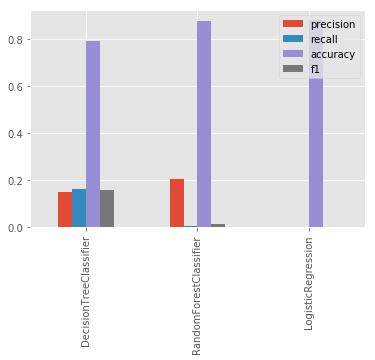

In [27]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

%matplotlib inline
pd.DataFrame(alg_dict).T[['precision', 'recall', 'accuracy', 'f1']].plot(kind='bar')

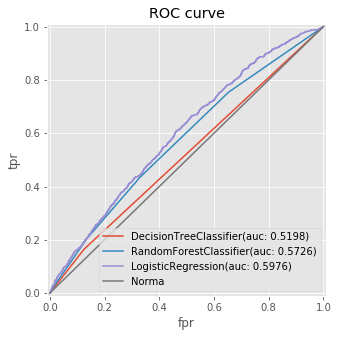

In [28]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(5, 5))

for alg_name, val in alg_dict.items():
    fpr, tpr, thresholds = roc_curve(y_test, val['predict_proba'])
    auc_score = roc_auc_score(y_test, val['predict_proba'])
    plt.plot(fpr, tpr, label=f"{alg_name}(auc: {auc_score:.4f})")

plt.plot([0, 1], [0, 1], label="Norma")
plt.legend()
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

from sklearn.model_selection import cross_val_score

for alg_name, val in alg_dict.items():
    val['cvs'] = cross_val_score(
        val['model'],
        df_set,
        target,
        scoring='roc_auc',
        cv=10
    )
    print(f"{alg_name}: {val['cvs'].mean():.4f}")
    print(val['cvs'])

DecisionTreeClassifier: 0.5270
[0.51617561 0.52159749 0.54199416 0.52131787 0.53059309 0.5386243
 0.5223969  0.52595537 0.52126434 0.52997891]
RandomForestClassifier: 0.5880
[0.59478484 0.60073849 0.58001113 0.60490593 0.60098619 0.56332412
 0.60366391 0.55665751 0.59807862 0.57718646]
LogisticRegression: 0.6066
[0.57522574 0.61500659 0.57684343 0.61440267 0.66189914 0.62104052
 0.62005914 0.57181896 0.62594102 0.58420411]


In [33]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# Т.к. точно не указано какую test выборку взять, берем из начального задания ОТП
# Если что, наша тестовая выборка из test-split уже посчитана и лежит тут: alg_dict['LogisticRegression']['predict_proba']

# Несмотря на то, что кросс-валидация указывает на LogisticRegression
best_alg = 'LogisticRegression'
test = df_test_preproc.drop(columns=['TARGET'])
test_result = df_test_preproc['TARGET']
model = alg_dict[best_alg]['model']

predict = model.predict_proba(test)[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


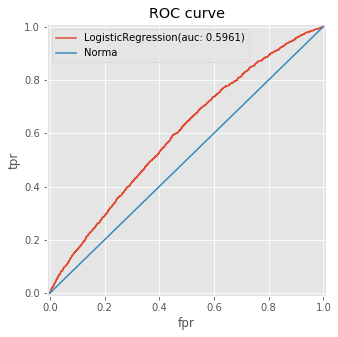

In [34]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

plt.figure(figsize=(5, 5))

fpr, tpr, thresholds = roc_curve(test_result, predict)
auc_score = roc_auc_score(test_result, predict)
plt.plot(fpr, tpr, label=f"{best_alg}(auc: {auc_score:.4f})")

plt.plot([0, 1], [0, 1], label="Norma")
plt.legend()
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

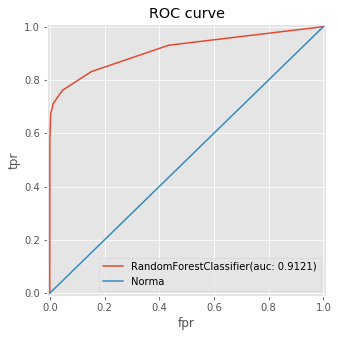

In [40]:
#### Мне не нравится, что на ближайшем преследователе RandomForestClassifier у нас auc в полтора раза больше, почти 1.
#### Почему так? Разбиение такое? Качество данных плохое?

predict = alg_dict['RandomForestClassifier']['model'].predict_proba(test)[:,1]
plt.figure(figsize=(5, 5))

fpr, tpr, thresholds = roc_curve(test_result, predict)
auc_score = roc_auc_score(test_result, predict)
plt.plot(fpr, tpr, label=f"RandomForestClassifier(auc: {auc_score:.4f})")

plt.plot([0, 1], [0, 1], label="Norma")
plt.legend()
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.show()